# Genetic Programming Figures

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline
from src.autoks.backend.kernel import get_all_1d_kernels
from src.autoks.core.covariance import Covariance
from src.autoks.core.kernel_encoding import KernelNode

In [5]:
se_1, se_2, rq_1, rq_2 = [Covariance(k) for k in get_all_1d_kernels(['SE', 'RQ'], 2)]

In [6]:
covariance_1 = se_1 + (se_2 * rq_1)
covariance_1.raw_kernel = covariance_1.canonical()
print('Covariance 1 = %s' % covariance_1.infix)

covariance_2 = rq_2 * (rq_1 + rq_1)
covariance_2.raw_kernel = covariance_2.canonical()
print('Covariance 2 = %s' % covariance_2.infix)

Covariance 1 = ( RQ_1 * SE_2 ) + SE_1
Covariance 2 = ( RQ_1 + RQ_1 ) * RQ_2


In [7]:
def covariance_to_graph(covariance):
    tree = covariance.to_binary_tree()
    graph = tree.create_graph()
    return graph, tree

## Crossover

In [8]:
graph_1, tree_1 = covariance_to_graph(covariance_1)
graph_2, tree_2 = covariance_to_graph(covariance_2)

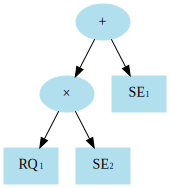

In [9]:
graph_1.node_attr.update(color='lightblue2', style='filled')
graph_1

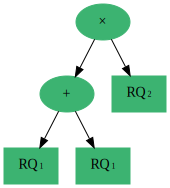

In [10]:
graph_2.node_attr.update(color='mediumseagreen', style='filled')
graph_2

In [11]:
from src.evalg.genprog import SubtreeExchangeRecombinator
recombinator = SubtreeExchangeRecombinator()

In [14]:
children = recombinator.crossover([tree_1, tree_2])
children

(KernelTree(root=KernelNode(label='+', value='+', left='*', right='RQ_1', parent=None)),
 KernelTree(root=KernelNode(label='*', value='*', left='+', right='RQ_2', parent=None)))

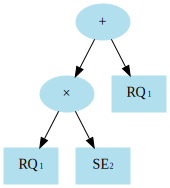

In [15]:
g = tree_1.create_graph()
g.node_attr.update(color='lightblue2', style='filled')
g

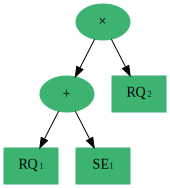

In [16]:
g = tree_2.create_graph()
g.node_attr.update(color='mediumseagreen', style='filled')
g

## Mutation

In [28]:
from src.evalg.genprog import HalfAndHalfMutator
operands = [cov.raw_kernel for cov in [se_1, se_2, rq_1, rq_2]]
operators = ['+', '*']
mutator = HalfAndHalfMutator(max_depth=2, binary_tree_node_cls=KernelNode)
mutator

HalfAndHalfMutator(max_depth=2)

In [29]:
# graph, tree = covariance_to_graph(covariance_1)
tree = covariance_1.to_binary_tree()
tree.infix()

'((RQ_1*SE_2)+SE_1)'

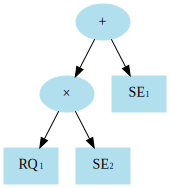

In [30]:
graph = tree.create_graph()
graph.node_attr.update(color='lightblue2', style='filled')
graph

In [32]:
mutator.mutate(operators, operands, tree)
print(tree.infix())

(SE_1+SE_1)


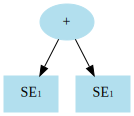

In [33]:
child_graph = tree.create_graph()
child_graph.node_attr.update(color='lightblue2', style='filled')
child_graph